#  CE-40959: Deep Learning

## Homework1: Preliminaries & Numpy (65pts)
 

You can run cells by hitting `Shift` + `Enter`. <br/>
We higly recommend you to read each line of code carefully and try to unserstand what it exactly does. You may want to use the techniques mentioned in this notebook in your next assignments.<br/>
Please review `Numpy Tutorial` notebook (materials of the first TA class) before coming to this notebook.

### Deadline:   2 Esfand

In [1]:
# importing modules
import numpy as np
import os
from svm import SVM
import time
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots

# The following two lines let us reload external modules in the notebook
%load_ext autoreload
%autoreload 2

## Problem 1. Computational Graph (13pts)

In this problem, you have to compute the gradient of $out$ which will be computed in function `gradients` with respect to $x$, $y$, $z$, $w$, $t$ (i.e., $\large{\frac{\partial{out}}{\partial{x}}}$, $\large{\frac{\partial{out}}{\partial{y}}}$, $\large{\frac{\partial{out}}{\partial{z}}}$, $\large{\frac{\partial{out}}{\partial{w}}}$, $\large{\frac{\partial{out}}{\partial{t}}}$) using the chain rule and save them in $grad\_x$, $grad\_y$, $grad\_z$, $grad\_w$, $grad\_t$ and return them.

Here is the computations that should be done by `gradients` in a mathematical form:

\begin{equation}
z = matmul(x, I - y) \\
\\
w = x * x \\
\\
t = -\frac{1}{log(w + abs(z))} \\
out = \text{sum  of  the elements  of}\;t\\
\end{equation} 


Note: $\mathbf I$ in the first equation is the Identity matrix. $\mathbf{matmul}$ is matrix multiplication. $\mathbf *$ is elementwise multiplication. $\mathbf{log}$ is to the base of $\mathbf{e}$. $\mathbf{abs}$ in the third equation is the (elementwise) absolute value. 

In [2]:
def gradients(x, y):
    """
    x: a numpy 2d-array with shape (N, M)
    y: a numpy 2-d array with shape (M, M)
    ouput: grad_x, grad_y, grad_z, grad_w, grad_t which are numpy ndarrays
    """
    z, w, t, out = [None] * 4
    grad_x, grad_y, grad_z, grad_w, grad_t = [None] * 5
    ####################################################################################
    # TODO: 1) build the computational graph specified by the equations above and save #
    #          the values in z, w, t, out.                                             #
    #       2) compute the gradients of out with respect to x, y, z, w, t and save     #
    #          them in grad_x, grad_y, grad_z, grad_w, grad_t respectively.            #
    #          Hint: Note that the gradient of a scalar with respect to a matix M has  #
    #          always the same shape as M.                                             #
    ####################################################################################
    N, M = x.shape
    z = np.matmul(x, np.eye(M) - y)
    w = x * x
    t = -1/np.log(w + np.abs(z))
    out = np.sum(t)
    grad_t = np.ones((N, M))
    grad_w = 1/((np.log(w + np.abs(z))**2) * (w + np.abs(z)))
    grad_z = grad_w * (np.abs(z)/z)            
    grad_y = np.matmul(-x.T, grad_z)
    grad_x = grad_w * (2*x) + np.matmul(grad_z, (np.eye(M) - y).T)
    ####################################################################################
    #                                 END OF YOUR CODE                                 #
    ####################################################################################
    return grad_x, grad_y, grad_z, grad_w, grad_t

Let's check if you have correctly computed gradients. You have to get small values as the ouput. The largest order of ours is 1e-8.

In [3]:
def test_gradients():
    np.random.seed(42)
    x = np.random.rand(3, 4)
    y = np.random.rand(4, 4)
    
    grad_x, grad_y, grad_z, grad_w, grad_t = gradients(x, y)
    
    correct_grad_x = [[ 98.53486691, 178.15428636, 101.50170543, 140.87675175],
                      [-29.11111973, -50.35135437, -61.51644322, 396.80894273],
                      [260.24004063, 319.32608058, 119.95375672, 653.73810858]]
    
    correct_grad_y = [[ 175.60725449,  221.87847075,    6.64595782, -101.40000624],
                      [ 273.07420644,  308.49236288,   11.29541668, -109.51168111],
                      [  99.83039306,   74.98883877,    5.30629792,   -5.51204454],
                      [ 284.95194676,  363.24817383,   11.92286996, -270.95042005]]
    
    correct_grad_z = [[-130.17216803,  -93.01792945,   -6.91408473,   -9.96854119],
                      [  -3.81552552,   -9.39164072,   -2.01597763,  174.60396305],
                      [-210.03844462, -308.71671769,   -6.22480814,  129.57944883]]
    
    correct_grad_w = [[130.17216803,  93.01792945,   6.91408473,   9.96854119],
                      [  3.81552552,   9.39164072,   2.01597763, 174.60396305],
                      [210.03844462, 308.71671769,   6.22480814, 129.57944883]]
    
    correct_grad_t = [[1., 1., 1., 1.],
                      [1., 1., 1., 1.],
                      [1., 1., 1., 1.]]
    
    print(grad_t)
    print(grad_w)
    print(grad_z)
    print(grad_x)
    print(grad_y)
    
    print('relative error of grad_x:', np.linalg.norm(grad_x - correct_grad_x))
    print('relative error of grad_y:', np.linalg.norm(grad_y - correct_grad_y))
    print('relative error of grad_z:', np.linalg.norm(grad_z - correct_grad_z))
    print('relative error of grad_w:', np.linalg.norm(grad_w - correct_grad_w))
    print('relative error of grad_t:', np.linalg.norm(grad_t - correct_grad_t))
    

test_gradients()    

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[130.17216803  93.01792945   6.91408473   9.96854119]
 [  3.81552552   9.39164072   2.01597763 174.60396305]
 [210.03844462 308.71671769   6.22480814 129.57944883]]
[[-130.17216803  -93.01792945   -6.91408473   -9.96854119]
 [  -3.81552552   -9.39164072   -2.01597763  174.60396305]
 [-210.03844462 -308.71671769   -6.22480814  129.57944883]]
[[ 98.53486691 178.15428636 101.50170543 140.87675175]
 [-29.11111973 -50.35135437 -61.51644322 396.80894273]
 [260.24004063 319.32608058 119.95375672 653.73810858]]
[[ 175.60725449  221.87847075    6.64595782 -101.40000624]
 [ 273.07420644  308.49236288   11.29541668 -109.51168111]
 [  99.83039306   74.98883877    5.30629792   -5.51204454]
 [ 284.95194676  363.24817383   11.92286996 -270.95042005]]
relative error of grad_x: 1.065325988662182e-08
relative error of grad_y: 1.2540143926156478e-08
relative error of grad_z: 1.0685188368255285e-08
relative error of grad_w: 1.0685188368255285e-08
relative err

## Problem 2. Shy away from for loops! (12pts)
Suppose that we have a matrix called $X$ which is a numpy 2d-array with shape $(N_1, D)$. This matrix has $N_1$ rows and the $i$-th row represents a $D-$dimensional vector such as $X_i$ (called an instance). There is also another matrix named $Y$ with the shape $(N_2, D)$. Note that $N_1$ is not necessarily equal to $N_2$. Our goal is to compute the following value for each instance in the first matrix and each instance in the second matrix:

\begin{equation}
 \\
V(X_i, Y_j) = {\sum_{k=1}^{D}{(x_k - y_k)^3}}
\end{equation}

where $X_i = [x_1, x_2, ...., x_D]$ and $Y_j = [y_1, y_2, ..., y_D]$ are the $i$-th and $j$-th instance in the first and second matrix respectively.

We want to compute a matrix `V` whose $(i, j)$-th entry is $V(X_i, Y_j)$. Complete the code of following functions to do this task.

In [4]:
def values_with_for_loop(X, Y):
    """
    X: numpy 2d-array with shape (N1, D)
    Y: numpy 2d-array with shape (N2, D)
    V: Values matrix which should be a 2d-array with shape (N1, N2)
    """
    V = None
    #####################################################################################
    # TODO:                                                                             #
    # Compute V(X_i, Y_j) for each i and j and store it in V[i, j]. You are free to use #
    # for loops (preferably one or two for loops as more than that might run            #
    # prohibitively slowly!) in your implementation. You are free to use any Numpy      #
    # function you want.                                                                #
    #####################################################################################
    N1 = X.shape[0]
    N2 = Y.shape[0]
    V = np.zeros((N1, N2))
    for i in range(N1):
        for j in range(N2):
            V[i,j] = np.sum((X[i] - Y[j])**3)
    #####################################################################################
    #                                 END OF YOUR CODE                                  #
    #####################################################################################
    return V

Now let's test your implementation of `values_with_for_loop` with the following function. You have to witness a small value as the ouput. we get an ouput of the order of 1e-6.

In [5]:
np.random.seed(42)
def test_values_with_for_loop():
    X = np.random.randn(10, 8)
    Y = np.random.randn(8, 8)
    
    out_correct = np.asarray([[  8.765334,    20.010048,    18.260977,    43.856083,   -14.216753,
                                 29.56002,     29.146101,    51.783203  ],
                              [ -28.092327,    -7.90782,     -1.9417393,  -19.624632,   -33.951344,
                                -74.167725,   -19.233025,   -34.774654  ],
                              [ -9.0146055,   -4.3492904,   19.111053,   -19.567537,   -23.901215,
                                -29.252842,   -13.360028,    -6.035372  ],
                              [ -17.440336,    34.22961,     17.316256,   -19.815384,   -17.601694,
                                -15.11916,     -0.2324852,   -2.339958  ],
                              [ -16.793228,   -13.687567,    -2.0563402,  -13.523884,   -61.872227,
                                -71.84135,     -3.8474934,  -34.78388   ],
                              [ -5.693445,    15.429427,     6.4837265,   -8.542441,   -18.958473,
                                -29.938059,     1.6775647,   -7.4752984 ],
                              [ -9.28221,      3.8474603,    1.0413681,   12.016386,   -70.26817,
                                 4.750604,    11.754794,    16.634857  ],
                              [ -10.45044,     -0.9044826,    0.48504904,  -5.3853908,  -39.49779,
                                -6.7880898,  -14.213244,     4.442503  ],
                              [  5.0958433,   31.653896,    22.115992,    10.347621,    -0.3687537,
                                 11.317683,    14.432735,    21.924892  ],
                              [ -76.88806,    -18.312935,   -12.917151,   -89.0802,     -35.949398,
                                -56.66989,    -34.12826,    -34.17443   ]])
    out = values_with_for_loop(X, Y)
    print('relative error of values:', np.linalg.norm(out - out_correct))
    
test_values_with_for_loop()  

relative error of values: 9.765821008345065e-06


Now, let's make it more challenging!

In [6]:
def values_without_for_loop(X, Y):
    V = None
    ################################################################################
    # TODO:                                                                        #
    # Compute the matrix V WITHOUT for loops this time!                            #
    # Note that if you use for loops you will get no points.                       #  
    # Hint: Implement this function with vectorized computations.                  #
    #       Try to write the values in the form of matrix multiplication.          #
    ################################################################################
    N2, D = Y.shape
    N1, _ = X.shape
    x3 = np.sum(X**3, axis=1)
    x3 = x3[:, np.newaxis]
    y3 = np.sum(Y**3, axis=1)
    y3 = y3[np.newaxis, :]
    x2y = np.matmul(X**2, Y.T)
    xy2 = np.matmul(X, (Y**2).T)
    V = (x3 - y3) - 3*x2y + 3*xy2
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    return V

Now let's test your implementation of `values_without_for_loop`. You should get a small value as the output. Ours is of the order of 1e-13.

In [7]:
np.random.seed(42)
def test_values_without_for_loop():
    X = np.random.randn(20, 25)
    Y = np.random.randn(30, 25)
    
    out_correct = values_with_for_loop(X, Y)
    out = values_without_for_loop(X, Y)
    
    print(np.linalg.norm(out - out_correct))
    
test_values_without_for_loop()

3.4092374978018e-13


Finally, let's compare the running time of functions! We have provided the following code snippet to do it.

In [8]:
a = np.random.randn(1000, 150)
b = np.random.randn(800, 150)

tic = time.time()
values_with_for_loop(a, b)
toc = time.time()
print('Running time of values with for loop:', toc - tic, 'seconds')

tic = time.time()
values_without_for_loop(a, b)
toc = time.time()
print('Running time of values without for loop:', toc - tic, 'seconds')

Running time of values with for loop: 10.964305877685547 seconds
Running time of values without for loop: 0.0370638370513916 seconds


You should see a huge improvement in runnnig time of `values_without_for_loop` compared to `values_with_for_loop`. This experiment shows how vectorized and matrix computations in Numpy could be much more effiecient than just naively using for loops in Python. Numpy is a powerful module with a beautiful functional API and many of its functions are implemented in C which results in a great efficiency. Nevertheless, one of the biggest disadvantages of Numpy is that it cannot run on GPU. By using deep learning frameworks such as TensorFlow, PyTorch, Keras, and ... we will sidestep this problem.

## Problem 3. Jacobian (10pts)
We have provided the function `func` for you below. You have to find out the operations done by this function and then complete the code of `jacobian_func` to compute the jacobian of the output of `func` (i.e. x_4). Note that the Jacobian of a function $\mathbf{f}$: $\mathbb{R}^n \rightarrow \mathbb{R}^m$ is an $m \times n$ matrix defined as follows:

<img src="image/jacobian.png" style="width: 400px;"/>

**Note:** Write down the computations on a paper and take the derivatives manually. Then, implement `jacobian_func` using Numpy. <br/>
Approximating the gradients using numerical methods DOES NOT get any points!

In [9]:
def func(x):
    """
    x: input vector as a numpy 1d-array.
    """
    x1 = x - np.ones_like(x)
    x2 = x1 ** 2
    x3 = np.empty_like(x2)
    for i in range(len(x3)-1):
        x3[i] = x2[i] * np.exp(x2[i+1])
    
    x4 = x3[::2].copy()
    
    return x4

In [10]:
def jacobian_func(x):
    """
    x is the same input passed to func on which the computations are done.
    you have to return the jacobian of the output of func.
    """
    ################################################################################
    # TODO: consider func and its output x_4 and compute its jacobian.             #
    # x is the same input we pass to func.                                         #
    ################################################################################
    x_1 = x - np.ones_like(x)
    x_even_1 = x_1[:-1:2]
    x_odd_1 = x_1[1::2]
    x_even_1_sq = x_even_1**2
    x_odd_1_sq = x_odd_1**2
    x_odd_1_sq_ex = np.exp(x_odd_1_sq)
    dfi_dxi = 2*(x_even_1)*(x_odd_1_sq_ex)
    dfi_dxi1 = (x_even_1_sq)*(2*x_odd_1)*(x_odd_1_sq_ex)
    #print(dfi_dxi1)
    #print(func(x))
    #print(dfi_dxi)
    m = func(x).shape[0]
    n = x.shape[0]
    J = np.zeros((m,n))
    J[np.arange(m), np.arange(0,n,2)] = dfi_dxi
    J[np.arange(m), np.arange(1,n,2)] = dfi_dxi1
    return J
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################

In [11]:
x = np.random.randn(10)
print(x.dtype)
print(jacobian_func(x))

y1 = func(x)
x[1] = x[1] + 1e-8
y2 = func(x)
print((y2 - y1)/1e-8)

float64
[[-9.26034886e-01 -4.62104571e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.46889993e+01 -3.40635549e+01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.88161965e+00  3.45039204e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -4.85856788e+01 -2.31868189e+02
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -8.34550289e+01 -1.19115516e+02]]
[-0.04621045  0.          0.          0.          0.        ]


## Problem 4. Preprocessing (12pts)

### 4.1. Loading Data

Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms.<br/> 
We have provided this dataset saved in some files under the `data` directory for you.  Training data has been saved in 5 files (`train1.npy`, ..., `train5.npy`) and test data file is `test.npy`. Labels are also stored in two files `labels_train` and `labels_test`.

In [12]:
def load_data(root_path):
    """
    root_path: the root directory of data files.
    outputs:
    1) test_data: test data which is a numpy array of shape (10000, 784).
    2) train_data_array: a Python list containing 5 numpy 2d-arrays each one of them has the shape (12000, 784).
    3) test_labels: a numpy array with shape (10000, ) containing the labels (0 to 9) of the test set images.
    4) train_labels: a numpy array with shape (60000, ) containing the labels (0 to 9) of the training set images.
    """
    train_data_file_names = ['train{}.npy'.format(x) for x in range(1, 6)]
    test_data_file_name = 'test.npy'
    test_labels_file_name = 'labels_test.npy'
    train_labels_file_name = 'labels_train.npy'
    
    train_data_list = []
    for file_name in train_data_file_names:
        file_path = os.path.join(root_path, file_name)
        ################################################################################
        # TODO: provided the file path, load the train data in the form of numpy array #
        # and append it to the end of train_data_list.                                 #
        ################################################################################
        train_data_list.append(np.load(file_path))
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
    
    ################################################################################
    # TODO: load the test data, test labels and train labels in the form of numpy  #
    # arrays as well and save them in test_data, test_labels and train_labels.     #                                                              #
    ################################################################################
    file_path = os.path.join(root_path, test_data_file_name)
    test_data = np.load(file_path)
    file_path = os.path.join(root_path, test_labels_file_name)
    test_labels = np.load(file_path)
    file_path = os.path.join(root_path, train_labels_file_name)
    train_labels = np.load(file_path)
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    
    return test_data, train_data_list, test_labels, train_labels

Now let's test your implementation of `load_data` with the following function. You have to get no erros after running this function:

In [13]:
def test_load_data(root_path):
    test_data, train_data_list, test_labels, train_labels = load_data('data')
    assert test_data.shape == (10000, 784)
    assert len(train_data_list) == 5
    assert test_labels.shape == (10000, )
    assert train_labels.shape == (60000, )
    assert train_data_list[0].shape == (12000, 784)
    print('You have successfully loaded the data!')
    
test_load_data('data')

You have successfully loaded the data!


Each one of the samples of Fashion-MNIST dataset is a $28\times28$ graysacle image. Pixel values are between 0 and 255. Here is an image of a t-shirt in the dataset:

<img src="image/mnist.jpg" >

### 4.2. Concatenation
You have loaded the training data as a list of five numpy arrays, each one of them has the shape $(12000, 784)$. We need to concatenate these five arrays into one array with shape $(60000, 784)$. <br/> 
In this part you should Implement a function for cancatenating a set of numpy nd-arrays given to you in a Python list (Note that the list does not necessarily contain five arrays and the arrays might not be 2d-arrays! You have to implement the function for general case). You have to do the concatenation along the first dimension i.e. axis=0. You are **not** allowed to use `np.concatenate`, `np.hstack`, and `np.vstack` in your code and you have to do it from scratch using Numpy.

In [14]:
def concat(list_of_arrays):
    """
    list_of_arrays is a non-empty list of numpy arrays (with arbitrary number of dimensions) with the SAME shape
    output: array_concat which is a numpy ndarray
    """
    array_concat = None
    ################################################################################
    # TODO: you have to concatenate the numpy arrays along the first axis into one #
    # single numpy array called array_concat.                                      #
    # You are not allowed to use np.concatenate, np.hsatck, and np.vstack          #
    # in your implementation.                                                      #
    # for example if list_of_arrays is [arr1, arr2] and                            #
    # arr1: [[1, 1, 1], [1, 1, 1]] (shape: (2, 3))                                 #
    # arr2: [[2, 2, 2], [2, 2, 2]] (shape: (2, 3))                                 #
    # you have to return                                                           #
    # output: [[1, 1, 1], [1, 1, 1], [2, 2, 2], [2, 2, 2]] (shape: (4,3))          #
    # In fact, you have to implement the function np.cancatenate() from scratch    #
    # by yourself.                                                                 #
    ################################################################################
    number_of_arrays = len(list_of_arrays)
    #dim_ex_1 = np.prod(list_of_arrays[0].shape[1:])
    shape = list(list_of_arrays[0].shape)
    dim1 = shape[0]
    shape[0] = shape[0]*number_of_arrays
    array_concat = np.zeros(tuple(shape))
    for i, array in enumerate(list_of_arrays):
        array_concat[dim1*i:dim1*(i+1)] = array
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    return array_concat

Now let's test your implementation with the following function. You have to get no errors.

In [15]:
def test_concat():
    t1 = [np.random.randn(10) for _ in range(10)]
    t2 = [np.random.randn(5, 3) for _ in range(5)]
    t3 = [np.random.randn(1, 5, 3, 4) for _ in range(3)]
    t3 = [np.random.randn(100, 5, 2, 5, 14) for _ in range(3)]
    t1_concat, t2_concat, t3_concat = concat(t1), concat(t2), concat(t3)
    assert np.array_equal(t1_concat, np.concatenate(t1, axis=0))
    assert np.array_equal(t2_concat, np.concatenate(t2, axis=0))
    assert np.array_equal(t3_concat, np.concatenate(t3, axis=0))
    print('you have successfully implemented concatenation!')

test_concat()

you have successfully implemented concatenation!


Now let's concat `train_data_list` with your `concat` function and save it in `train_data`:

In [16]:
test_data, train_data_list, test_labels, train_labels = load_data('data')
train_data = concat(train_data_list)
assert train_data.shape == (60000, 784)

Next step is visualizing some of the images we have loaded. But, first we have to reshape each sample into a 2d-array.

### 4.3. Reshape
Complete the function `reshape` to reshape a flat array with shape $(N, d^2)$ to an array with shape $(N, d, d)$. You can use `np.reshape` in your implementation.

In [17]:
def reshape(x):
    """
    x is an array with shape (N, d*d)
    output: x_reshaped which is numpy 3d-array with shape (N, d, d)
    """
    x_reshaped = None
    ################################################################################
    # TODO: You have to reshape the input x which has the shape (N, d^2) to an     #
    # array with shape (N, d, d) and save it in x_reshaped.                        #                                          
    ################################################################################
    x_reshaped = x.reshape(np.int(x.shape[0]),np.int(np.sqrt(x.shape[1])),np.int(np.sqrt(x.shape[1])))
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    return x_reshaped

Now let's test you implementation of `reshape` with the following function.

In [18]:
def test_reshape():
    a = np.empty([531, 100])
    b = np.empty([3000, 4096])
    c = np.empty([10000, 10000])
    a_reshaped, b_reshaped, c_reshaped = reshape(a), reshape(b), reshape(c) 
    assert a_reshaped.shape == (531, 10, 10)
    assert b_reshaped.shape == (3000, 64, 64)
    assert c_reshaped.shape == (10000, 100, 100)
    print('you have successfully implemented reshape!')
    
test_reshape()

you have successfully implemented reshape!


### 4.4. Visualization
Let's apply your reshape function on some of the samples in the dataset and visualize them:

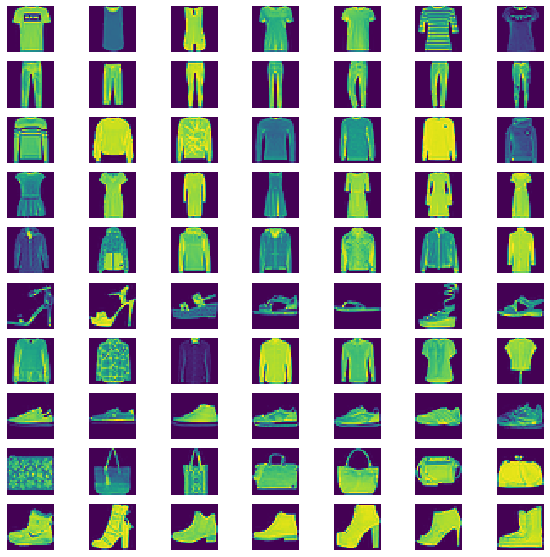

In [19]:
samples_per_class = 7

for i in range(10):
    idxs = np.where(train_labels==i)[0]
    idxs = idxs[:samples_per_class]
    sample_imgs = reshape(train_data[idxs])
    
    for j, idx in enumerate(idxs):
        plt_idx = i * samples_per_class + j + 1
        plt.subplot(10, samples_per_class, plt_idx)
        plt.imshow(sample_imgs[j])
        plt.axis('off')

### 4.5. Split
During this course, you will see that we mostly partition our training data into train and validation set. Implement the following function to split the given data into two sets provided the ratio between the size of validation set and the whole training dataset. You **cannot** use `np.array_split()` or `np.split()` in the first function.

In [20]:
def split_train_1(x, val_ratio=0.1):
    """
    x: a numpy ndarray
    val_ratio: ratio between the size of validation set and x
    ouputs: x_train, x_val: numpy ndarrays
    """
    x_train, x_val = None, None
    #################################################################################
    # TODO: split the input x (numpy ndarray) into two sets x_train and x_val given #
    # the ratio between the number of the elements in the validation set (x_val)    # 
    # and the number of elements in x (e.g. if val_ratio=0.2 and                    #
    # x's shape is (1000, 2, 3, 5) then x_train's shape would be (800, 2, 3, 5)     #
    # and x_val's shape would be (200, 2, 3, 5)). Note that if N is                 #
    # the number of instances in x then N * (1 - val_ratio) first instances would   #
    # be x_train and the last N * val_ratio instances would be x_val.               #
    # you cannot use np.split or np.array_split in your implementation.             #                    
    #################################################################################
    num = x.shape[0]
    num_train = int(num * (1 - val_ratio))
    num_val = int(num * val_ratio)
    x_train = x[:num_train]
    x_val = x[num_train:]
    #################################################################################
    #                                 END OF YOUR CODE                              #
    #################################################################################
    return x_train, x_val

def split_train_2(x, val_ratio=0.1):
    """
    x: a numpy ndarray
    ratio: ratio between the size of validation set and size of input x
    ouputs: x_train, x_val: numpy ndarrays
    """
    #################################################################################
    # TODO: implement the above function with np.split.                             #                
    #################################################################################
    x_split = np.split(x, np.array([1 - val_ratio]))
    x_train = x_split[0]
    x_val = x_split[1]
    #################################################################################
    #                                 END OF YOUR CODE                              #
    #################################################################################
    return x_train, x_val

In [21]:
x = np.random.randn(1000,2,3,5)
x_train , x_val = split_train_1(x)
x_train1 , x_val1 = split_train_1(x)
print(x_train.shape)
print(x_train1.shape)


(900, 2, 3, 5)
(900, 2, 3, 5)


### 4.6. Shuffle

Shuffling data serves the purpose of making sure that models remain general and overfit less. You will want to shuffle the data to make sure that the training/test/validation sets are representative of the overall distribution of the data.<br/>
Consider the function `shuffle` which takes two parameters: 
1. $x$ which is a numpy nd-array with shape $(N, d1, d2, ...)$ 
2. $y$ which is a numpy 1d-array with shape $(N, )$.

You have to complete this function so that it shuffles x and y with the **same** order.

In [22]:
def shuffle(x, y):
    """
    x: a numpy nd-array with shape (N, d1, d2, ...)
    y: a numpy 1d-array with shape (N, )
    output: x_shuffled and y_shuffled
    """
    x_shuffled, y_shuffled = None, None
    ################################################################################
    # TODO: You have to shuffle x and y with the                                   #
    # same order. for example if x is [[1, 1, 1], [2, 2, 2], [3, 3, 3]]            #
    # and y is [1, 2, 3] then a valid shuffling would be                           #
    # x_shuffled: [[3, 3, 3], [1, 1, 1], [2, 2, 2]]                                #
    # y_shuffled: [3, 1, 2]                                                        #
    # Note that the only condition you have to satisfy is that the order of        #
    # shuffling for both x and y should be the same and there is no other          #
    # limitation on the order. Therefore there may be more than one valid          #
    # shuffling.                                                                   #
    # you can use np.random.shuffle() for shuffling.                               #                                                    #                                          
    ################################################################################
    num = y.shape[0]
    arr = np.arange(num)
    np.random.shuffle(arr)
    x_shuffled = x[arr]
    y_shuffled = y[arr]
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    return x_shuffled, y_shuffled


Make sure that your implementation is correct with the following simple test:

In [23]:
def test_shuffle():
    x = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    y = np.array([1, 2, 3])
    x_shuffled, y_shuffled = shuffle(x, y)
    print(x_shuffled)
    print(y_shuffled)

test_shuffle()

[[2 2 2]
 [3 3 3]
 [1 1 1]]
[2 3 1]


## Problem 5. Linear Multi-Class SVM with Soft-Margin (18pts)

Multiclass SVM aims to assign labels to instances by using support-vector machines, where the labels are drawn from a finite set of several elements.

There are several ways to define a loss function for multi-class SVM. In this problem, the following loss function will be used for training the multi-class SVM (Please take a look at p. 46 of the ML Review slides):

\begin{equation}
\large
J(W) = \frac{1}{N} \sum_{i=1}^{N}{L^{(i)}} + \lambda ||W||^2\\
\large
L^{(i)} = \sum_{j \neq y^{(i)}}^{}{max(0, 1 + s_j - s_{y^{(i)}})} = \sum_{j \neq y^{(i)}}^{}{max(0, 1 + w_j^T x^{(i)} - w_{y^{(i)}}^T x^{(i)})}
\;\\
\end{equation} 


First, let's use the functions of the previous problem to preprocess the data and make 4 sets `X_train`, `X_val`, `y_train`, `y_val`.

In [61]:
np.random.seed(42)

test_data, train_data_list, test_labels, train_labels = load_data('data')
train_data = concat(train_data_list)

print(train_data.shape)  # Expected ouput: (60000, 784)
print(test_data.shape)  # Expected ouput: (10000, 784)
print(test_labels.shape)  # Expected ouput: (10000,)
print(train_labels.shape)  # Expected ouput: (60000,)

train_data_shuffled, train_labels_shuffled = shuffle(train_data, train_labels)
X_test, y_test = test_data, test_labels
X_train, X_val = split_train_1(train_data, val_ratio=1/60)
print(X_train.shape, X_val.shape)  # Expected ouput: (59000, 784) (1000, 784)
y_train, y_val = split_train_1(train_labels, val_ratio=1/60)
print(y_train.shape, y_val.shape)  # Expected ouput: (59000,) (1000,)

(60000, 784)
(10000, 784)
(10000,)
(60000,)
(59000, 784) (1000, 784)
(59000,) (1000,)


In [62]:
# >>>>>WARNING: RUN THIS CELL ONLY ONCE!<<<<<

# adding 1s to the end of feature vectors to be multiplied by bias term of weights
X_val = np.insert(X_val, 0, 1, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)  # Expected ouput: (59000, 785)
print(X_val.shape)  # Expected ouput: (1000, 785)
print(X_test.shape)  # Expected ouput: (10000, 785)

(59000, 785)
(1000, 785)
(10000, 785)


Open `svm.py` and complete the code of the linear svm model in it.

Let's check your implementations first:

Let's first check if your model computes the hinge loss correctly. You should witness a small values as the error:

In [63]:
np.random.seed(42)
toy_model = SVM(n_features=10, n_classes=5, std=0.001)
x = np.random.rand(20, 10)
y = np.random.randint(0, 5, 20)
correct_loss = 3.999079560852596
loss = toy_model.loss(x, y, 0.25)

print('relative error of loss:', abs(loss - correct_loss))

relative error of loss: 0.0


Now let's check if the gradients are computed correctly. You should get a small value as the error. Ours is of the order of 1e-8.

In [64]:
# >>>>>WARNING: RUN THIS CELL ONLY ONCE AFTER YOU RAN THE ABOVE CELL!<<<<<

gradient = toy_model.update_weights(learning_rate=1e-2)
correct_gradient = [[-0.24790043, -0.02616584,  0.0862217,  -0.066655,    0.25564707],
                    [-0.02056357,  0.05417903, -0.05449371, -0.07649293,  0.09846397],
                    [-0.01443777, -0.14332005, -0.00198323, -0.23687162,  0.39444998],
                    [-0.09852023,  0.03344655,  0.00652346, -0.15866452,  0.21542415],
                    [-0.2999338,  -0.04307378,  0.34938565, -0.32666563,  0.3199567 ],
                    [-0.1263978,   0.13268628,  0.15897914, -0.16465115, -0.00139483],
                    [-0.00084713, -0.17737171,  0.05615944,  0.03299787,  0.08956249],
                    [-0.1513251,  -0.05118482,  0.16787481, -0.12316938,  0.155753  ],
                    [-0.13682534,  0.14630157,  0.02634592, -0.10531288,  0.06899802],
                    [-0.13455525, -0.04130863,  0.11486015, -0.06620673,  0.12643906]]

assert gradient.shape == toy_model.W.shape
print('relative error of gradient:', np.linalg.norm(gradient - correct_gradient))

relative error of gradient: 1.8780251748468277e-08


Now let's train the main model:

In [65]:
from svm import SVM
model = SVM(n_features=785, n_classes=10, std=0.001)

Now let's train your model on the training set. Meanwhile, you have to witness that the printed loss drops significantly and the accuracy on validation set increases. Our loss and accuracy will reach values close to 1.0 and 79% respectively at the end of training.

In [66]:
loss_history = []

num_iters, batch_size = 1000, 200

for it in range(num_iters):
    X_batch, y_batch = None, None
    ################################################################################
    # TODO: Sample batch_size elements from the training data and their            #
    # corresponding labels to use in this round of gradient descent.               #
    # Store the data in X_batch and their corresponding labels in                  #
    # y_batch; after sampling X_batch should have shape (batch_size, n_features)   #
    # and y_batch should have shape (batch_size,)                                  #
    #                                                                              #
    # Hint: Use np.random.choice to generate indices. Sampling with                #
    # replacement is faster than sampling without replacement.                     #
    ################################################################################
    num_train = X_train.shape[0]
    indices = np.random.choice(num_train, batch_size, replace=True)
    X_batch = X_train[indices]
    y_batch = y_train[indices]
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    
    loss = model.loss(X_batch, y_batch, 2.5e4)
    
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        val_res = val_preds == y_val
        test_acc = np.sum(val_res) / len(val_res)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss, 100*test_acc))
    
    model.update_weights(learning_rate=1e-7)
    loss_history.append(loss)

iteration 0, loss 215.857650, val acc 16.70%
iteration 100, loss 74.673779, val acc 56.40%
iteration 200, loss 28.484524, val acc 68.40%
iteration 300, loss 11.400274, val acc 72.20%
iteration 400, loss 5.496402, val acc 73.90%
iteration 500, loss 2.986006, val acc 76.30%
iteration 600, loss 2.127942, val acc 75.70%
iteration 700, loss 2.002620, val acc 76.80%
iteration 800, loss 1.897914, val acc 75.70%
iteration 900, loss 1.903620, val acc 76.90%


Let's plot the training loss:

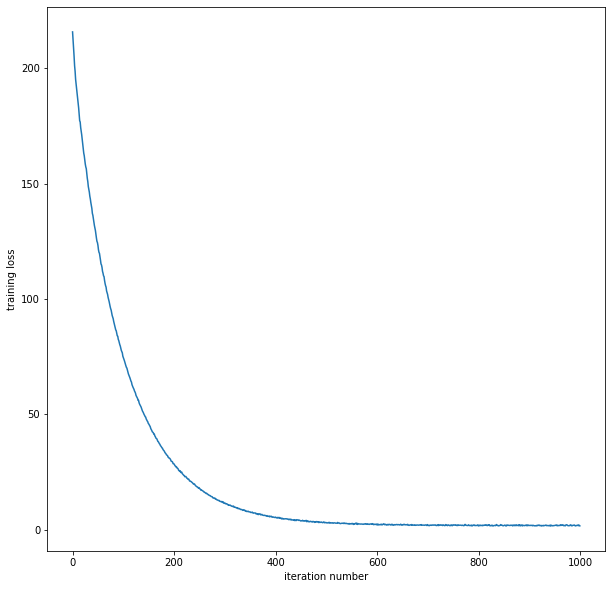

In [67]:
plt.plot(loss_history)
plt.ylabel('training loss')
plt.xlabel('iteration number')
plt.show()

Finally let's test your model on the test set. We get an accuracy above 75%.

In [68]:
predictions =  model.predict(X_test)
test_res = predictions == y_test
test_acc = np.sum(test_res) / len(test_res)
print("accuracy on test set: %.2f%%" % (100*test_acc))

accuracy on test set: 75.18%
